<a href="https://colab.research.google.com/github/sai-1903/sai-1903/blob/main/Churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Telco_Customer_Churn_Dataset  (2).csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


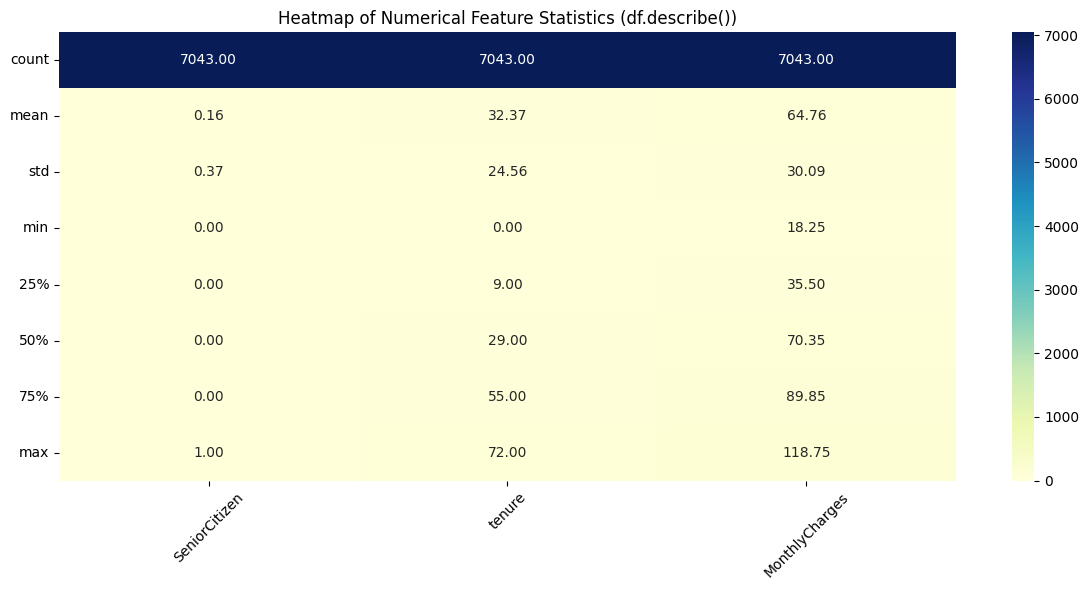

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.describe(),annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Numerical Feature Statistics (df.describe())")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-9-8a81f9e1494f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])


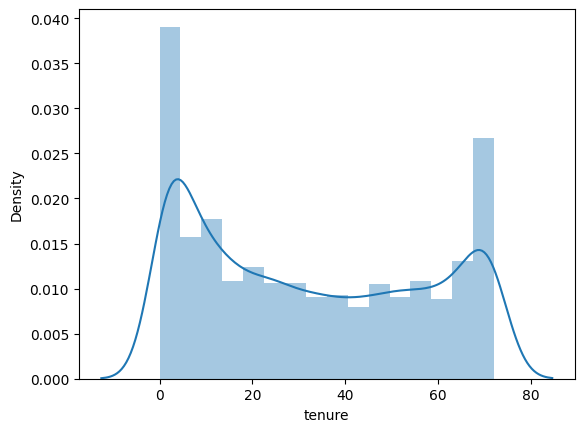

In [ ]:
sns.distplot(df['tenure'])
plt.show()

In [ ]:
#chechking the outliers for verification
min_range=df['tenure'].min()-3*df['tenure'].std()
max_range=df['tenure'].max()+3*df['tenure'].std()
min_range,max_range

(-73.67844306928268, 145.67844306928268)

<ipython-input-11-9114669cd63e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_tenture[['tenure']])


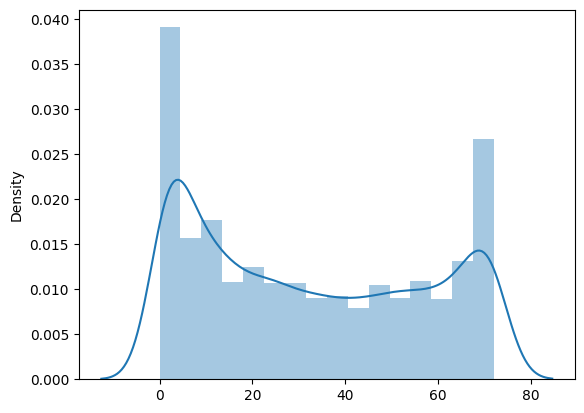

In [ ]:
new_tenture=df[(df['tenure']<=max_range)]
sns.distplot(new_tenture[['tenure']])
plt.show()

<ipython-input-13-65cf2824d61a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'])


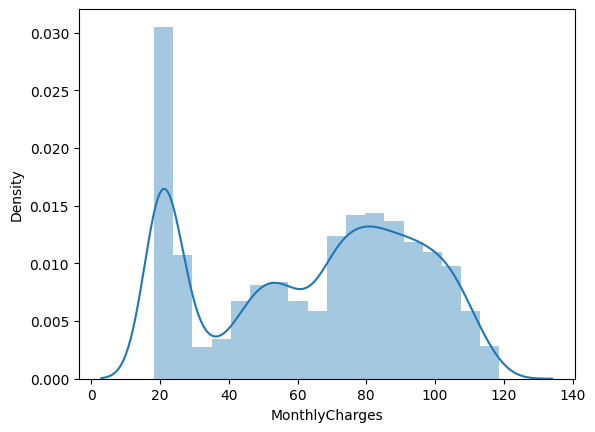

In [ ]:
sns.distplot(df['MonthlyCharges'])
plt.show()

In [ ]:
z_score = (df['MonthlyCharges']-df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()


In [ ]:
df['z_score']=z_score


In [ ]:
df[df['z_score']<3].shape

(7043, 22)

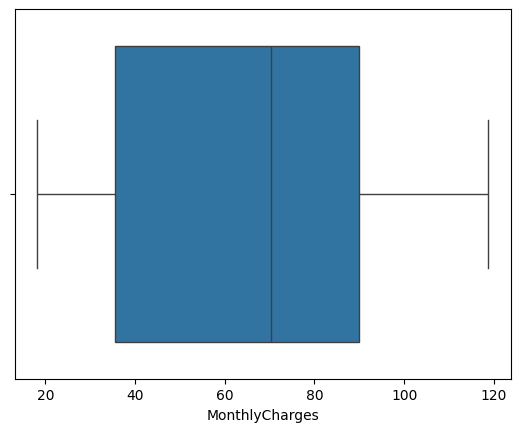

In [ ]:
sns.boxplot(x='MonthlyCharges',data=df)
plt.show()

In [ ]:
df.shape

(7043, 22)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'z_score'],
      dtype='object')

In [ ]:
df=df.drop(columns='customerID')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df= df.dropna(subset=['TotalCharges'])
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
Categorial_col=df.select_dtypes(include='object').columns.tolist()
Categorial_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
Numeric_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
Numeric_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'z_score']

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'z_score'],
      dtype='object')


<ipython-input-26-44fd133e23bf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=["skyblue", "salmon"])


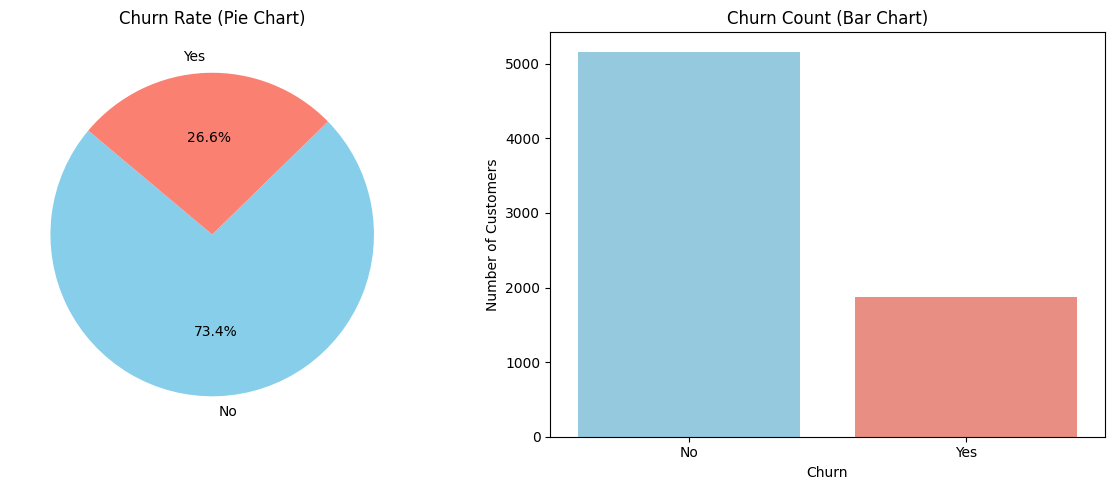

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step: Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

print(df.columns)

churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

# Create figure
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Churn Rate (Pie Chart)")

plt.subplot(1, 2, 2)
sns.countplot(x='Churn', data=df, palette=["skyblue", "salmon"])
plt.title("Churn Count (Bar Chart)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,z_score
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,-1.160241
1,1,0,0,0,34,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,-0.259611
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,-0.362635
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,-0.746482
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0.197351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,0.665945
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,1.277443
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,-1.168549
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0.320315


In [ ]:
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in replace_cols:
    if col in df.columns:
        df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping replacement.")


In [ ]:
multi_cat_cols = [col for col in df.columns if col in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                  'PaymentMethod', 'MultipleLines']]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)



In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'z_score', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
log_model.score(X_test,y_test)

0.7896233120113717

In [ ]:
log_preds = log_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[918 115]
 [181 193]]


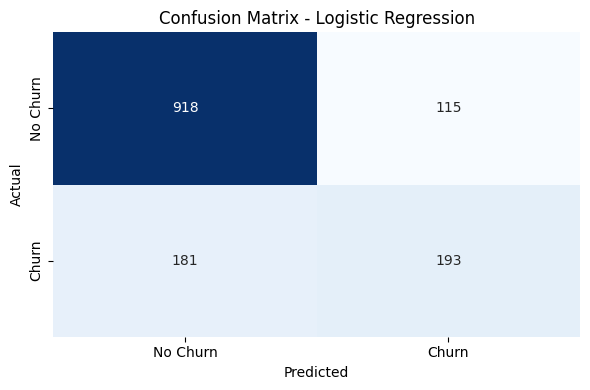

In [ ]:
cm = confusion_matrix(y_test, log_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

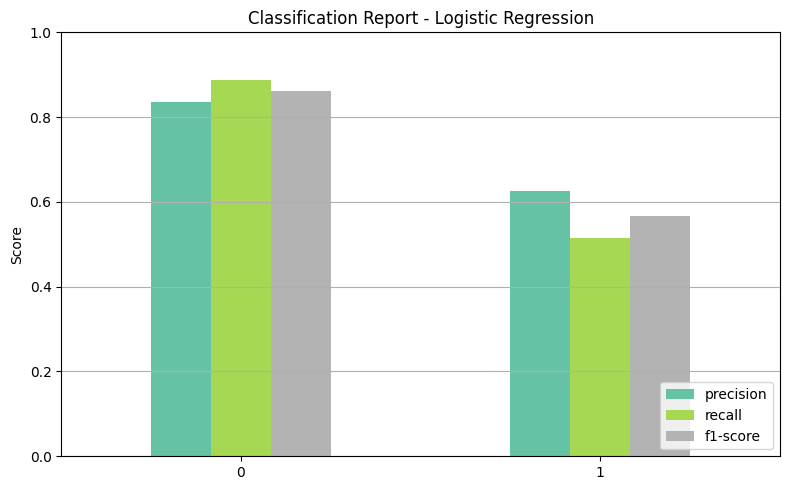

In [ ]:
report_dict = classification_report(y_test, log_preds, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Classification Report - Logistic Regression')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Applying  Another algorithm for reverification
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

[[929 104]
 [195 179]]
